In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import torch
from velovi import preprocess_data, VELOVI
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
from eval_utils import cross_boundary_correctness
import matplotlib.pyplot as plt
import pandas as pd
import unitvelo as utv
import time
from os.path import exists
method = 'VeloVI'

Global seed set to 0


(Running UniTVelo 0.2.5)
2024-03-04 10:10:12


In [2]:
datasets = ['Pancreas_with_cc', 'HumanDevelopingBrain', 'DentateGyrus' , 'MouseBoneMarrow', 'MouseErythroid', 'HumanBoneMarrow']
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results_revision/'

In [3]:
def add_velovi_outputs_to_adata(adata, vae):
    latent_time = vae.get_latent_time(n_samples=25)
    velocities = vae.get_velocity(n_samples=25, velo_statistic="mean")

    t = latent_time
    scaling = 20 / t.max(0)

    adata.layers["velocity"] = velocities / scaling
    adata.layers["latent_time_velovi"] = latent_time

    adata.var["fit_alpha"] = vae.get_rates()["alpha"] / scaling
    adata.var["fit_beta"] = vae.get_rates()["beta"] / scaling
    adata.var["fit_gamma"] = vae.get_rates()["gamma"] / scaling
    adata.var["fit_t_"] = (
        torch.nn.functional.softplus(vae.module.switch_time_unconstr)
        .detach()
        .cpu()
        .numpy()
    ) * scaling
    adata.layers["fit_t"] = latent_time.values * scaling[np.newaxis, :]
    adata.var['fit_scaling'] = 1.0

Pancreas_with_cc
Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:15) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 500/500: 100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [03:17<00:00,  2.54it/s, loss=-2.85e+03, v_num=1]
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Ngn3 high EP', 'Pre-endocrine'): 0.757205685261727, ('Pre-endocrine', 'Alpha'): 0.671935590345117, ('Pre-endocrine', 'Beta'): 0.8513100462328499, ('Pre-endocrine', 'Delta'): 0.4669307140846392, ('Pre-endocrine', 'Epsilon'): 0.22763327033082892}
Total Mean: 0.5950030612510323
# In-cluster Coherence
{'Alpha': 0.8824709, 'Beta': 0.89782155, 'Delta': 0.91228366, 'Ductal': 0.8847652, 'Epsilon': 0.8746355, 'Ngn3 high EP': 0.887478, 'Ngn3 low EP': 0.8868735, 'Pre-endocrine': 0.89136255}
Total Mean: 0.8897113800048828
HumanDevelopingBrain
Filtered out 17336 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
computing neighbors
    finished (0:00

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 230/500:  46%|███████████████████████████████████▉                                          | 230/500 [03:38<04:16,  1.05it/s, loss=-1.07e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1045.468. Signaling Trainer to stop.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/9443 [00:00<?, ?cells/s]

    finished (0:00:22) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Radial Glia', 'Intermediate \n Progenitor'): -0.39484710666874145, ('Intermediate \n Progenitor', 'Newborn \n Excitatory Neuron'): -0.729434140684705, ('Newborn \n Excitatory Neuron', 'Immature \n Excitatory Neuron'): -0.7739715054340792, ('Immature \n Excitatory Neuron', 'Mature \n Excitatory Neuron'): 0.502680216950309}
Total Mean: -0.3488931339593042
# In-cluster Coherence
{'Immature \n Excitatory Neuron': 0.8535849, 'Intermediate \n Progenitor': 0.90103513, 'Mature \n Excitatory Neuron': 0.8697524, 'Newborn \n Excitatory Neuron': 0.85565025, 'Radial Glia': 0.8840756}
Total Mean: 0.8728196024894714
DentateGyrus
Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, un

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 329/500:  66%|███████████████████████████████████████████████████▎                          | 329/500 [01:50<00:57,  2.97it/s, loss=-2.15e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -2030.931. Signaling Trainer to stop.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('nIPC', 'Neuroblast'): 0.8921133139846026, ('Neuroblast', 'Granule immature'): 0.5969623267618652, ('Granule immature', 'Granule mature'): -0.19180972295592508, ('Radial Glia-like', 'Astrocytes'): 0.7660648510889265, ('OPC', 'OL'): -0.13007574179973833}
Total Mean: 0.38665100541594616
# In-cluster Coherence
{'Astrocytes': 0.8296457, 'Cajal Retzius': 0.94661915, 'Cck-Tox': 0.9333304, 'Endothelial': 0.8671932, 'GABA': 0.90152353, 'Granule immature': 0.8498241, 'Granule mature': 0.8314768, 'Microglia': 0.87950414, 'Mossy': 0.8732558, 'Neuroblast': 0.8699115, 'OL': 0.9121674, 'OPC': 0.90029275, 'Radial Glia-like': 0.8800365, 'nIPC': 0.9064848}
Total Mean: 0.884376049041748
MouseBoneMarrow
Filtered out 20300 genes that

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
Epoch 300/500:  60%|█████████████████████████████████████████████████▊                                 | 300/500 [01:31<01:00,  3.28it/s, loss=-897, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -852.262. Signaling Trainer to stop.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2600 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('dividing', 'progenitors'): 0.6469167695007416, ('progenitors', 'activating'): 0.7723006477024233}
Total Mean: 0.7096087086015825
# In-cluster Coherence
{'B cell lineage': 0.7456881, 'activating': 0.8092857, 'dividing': 0.8133343, 'macrophages': 0.69686997, 'progenitors': 0.8626576}
Total Mean: 0.7855671048164368
MouseErythroid
Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', m

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 228/500:  46%|███████████████████████████████████▌                                          | 228/500 [03:44<04:27,  1.02it/s, loss=-1.07e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1021.918. Signaling Trainer to stop.
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8297804885116478, ('Blood progenitors 2', 'Erythroid1'): -0.03753325209724729, ('Erythroid1', 'Erythroid2'): -0.23190384858136645, ('Erythroid2', 'Erythroid3'): -0.7932127237302439}
Total Mean: -0.05821733397430248
# In-cluster Coherence
{'Blood progenitors 1': 0.83337873, 'Blood progenitors 2': 0.88945156, 'Erythroid1': 0.90237844, 'Erythroid2': 0.8967149, 'Erythroid3': 0.9218437}
Total Mean: 0.8887535333633423
HumanBoneMarrow
Filtered out 7837 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'conn

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 352/500:  70%|██████████████████████████████████████████████████████▉                       | 352/500 [03:48<01:36,  1.54it/s, loss=-1.52e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1466.680. Signaling Trainer to stop.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/5780 [00:00<?, ?cells/s]

    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): -0.0055087044936730535, ('HSC_1', 'HSC_2'): -0.2166611769413516, ('Ery_1', 'Ery_2'): -0.3269293504192579}
Total Mean: -0.18303307728476084
# In-cluster Coherence
{'CLP': 0.8658682, 'DCs': 0.89099824, 'Ery_1': 0.92225987, 'Ery_2': 0.9301323, 'HSC_1': 0.9018712, 'HSC_2': 0.9009522, 'Mega': 0.9006018, 'Mono_1': 0.89818484, 'Mono_2': 0.9085083, 'Precursors': 0.9007139}
Total Mean: 0.902009129524231


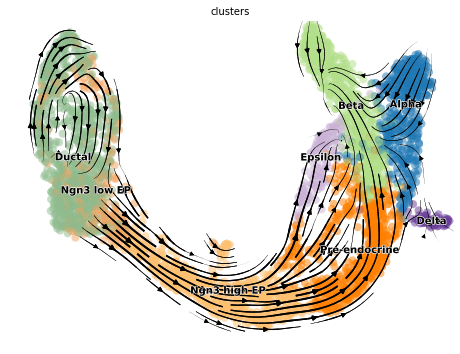

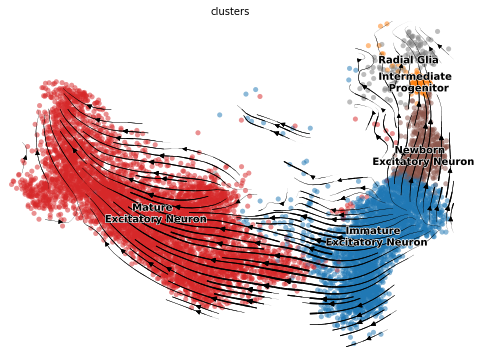

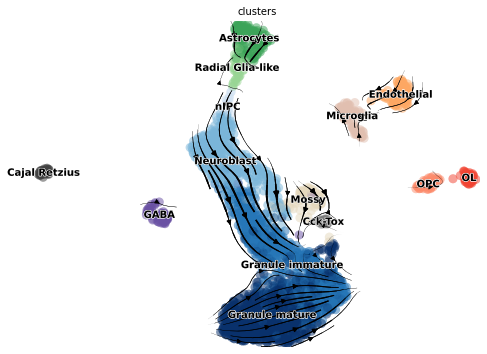

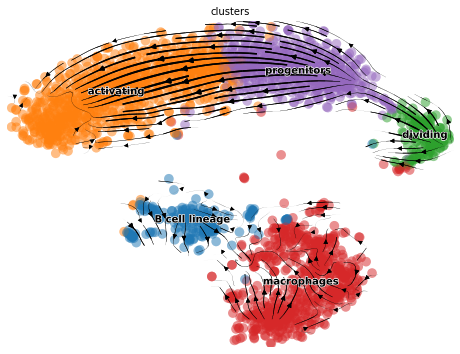

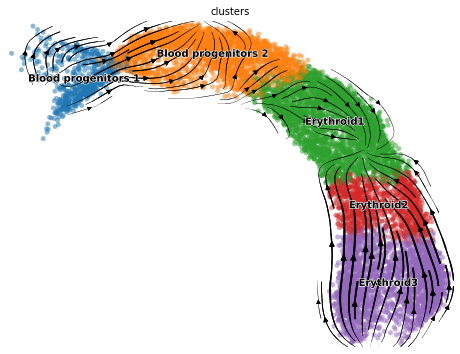

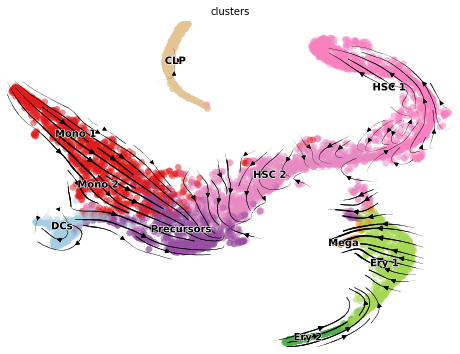

In [4]:
for dataset in datasets:
    print(dataset)
    adata = sc.read_h5ad(data_dir + dataset + '/' + dataset + '_anndata.h5ad')
    start = time.time()
    scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=3000)
    scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
    adata = preprocess_data(adata)
    VELOVI.setup_anndata(adata, spliced_layer="Ms", unspliced_layer="Mu")
    vae = VELOVI(adata)
    vae.train()
    add_velovi_outputs_to_adata(adata, vae)
    end = time.time()
    scv.pp.neighbors(adata)
    scv.tl.velocity_graph(adata)
    scv.tl.velocity_embedding(adata)
    fix, ax = plt.subplots(1, 1, figsize = (8, 6))
    scv.pl.velocity_embedding_stream(adata, basis='umap', save = False, vkey='velocity',
                                     show = False, ax = ax)
    plt.savefig(save_dir + 'UMAPs/' + dataset + '_UMAP_VeloVI.svg')
    # Calculate performance metrics:
    file = open(data_dir + dataset + '/' + dataset + '_groundTruth.pickle' ,'rb')
    ground_truth = pickle.load(file)
    metrics = utv.evaluate(adata, ground_truth, 'clusters', 'velocity')
    if exists(save_dir + dataset + '_CBDC_scores.csv'):
        tab = pd.read_csv(save_dir + dataset + '_CBDC_scores.csv', index_col = 0)
    else:
        tab = pd.DataFrame(columns = list(metrics['Cross-Boundary Direction Correctness (A->B)'].keys()) + ['Mean'],
                 index = [method])
    cb_score = [np.mean(metrics['Cross-Boundary Direction Correctness (A->B)'][x])
                for x in metrics['Cross-Boundary Direction Correctness (A->B)'].keys()]
    tab.loc[method,:] = cb_score + [np.mean(cb_score), end-start]
    tab.to_csv(save_dir + dataset + '_CBDC_scores.csv')
    scv.pl.velocity_embedding_stream(adata, basis='umap', save = False, vkey='velocity',
                                     show = False, ax = ax)
    plt.savefig(save_dir + 'UMAPs/' + dataset + '_UMAP_' + method + '.svg')
    adata.write_h5ad('/nfs/team283/aa16/data/fate_benchmarking/' + method + dataset + 'AnnDataForCellRank.h5ad')